### Simple DC-Motor Control
1. Exporting the Model as a Functional Mockup Unit (FMU)


In [17]:
import sys
sys.path.append('C:/Users/Daniele/Documents/GitLab/fair_sim_release/fair_sim_release')
from src.fmu_export import export_fmu


Define the model directory, model name and the modeling enviroment ("d" for Dymola "o" for OpenModelica)

In [18]:
model_directory = "C:/Users/Daniele/Desktop/"
model_name = "DCMotor"
modeling_environment = "d"

Store the data you want to import either in an Json File or in an python dictoinary. 
```Json
{"Parameters":[{"symbol": "d",
               "value": 0.1,
               "unit": "N*m*s/rad", //Optional
               "description": "Damping constant"}, //Optional
              {"symbol": "useHeatPort",
               "value": "false",
               "unit": "",
               "description": ""}]}
```
Specify the directory to the json file. Also store the name of the datasheet and the component name in the model in a dictionary.

In [19]:
datasheet_directory = "C:/Users/Daniele/Documents/GitLab/fair_sim_release/fair_sim_release/examples"
datasheets = {"damper" : "damper_datasheet"} #{component name : datasheet name}

Pramaters can also be imported using a python dictionary.

In [20]:
parameters = {"inertia.J" : 0.5}

When using dymola as the modeling enviroment, the path to the Dymola executable needs to be specified.

In [21]:
dymola_path = "C:/Program Files/Dymola 2018 FD01/bin64"          

Finally the output directory needs to be specified. And the fmu can be exported.

In [22]:
output_directory = "C:/Users/Daniele/Desktop/test"
fmu = export_fmu(modeling_environment, model_name, model_directory,dymola_path, output_directory, datasheet_directory= datasheet_directory, datasheets= datasheets, additional_parameters= parameters)

The FMU Export was successful.


Next we can write a Controler for the motor in python.

In [42]:
import sys
sys.path.append('C:/Users/Daniele/Documents/GitLab/fair_sim_release/fair_sim_release')
from simple_pid import PID
from src.abstract_control import Control

class _PID(Control):

    def __init__(self):
        self.pid = PID(1, 0.1, 0)
        self.pid.set_point = 100
        self.pid.sample_time = 0.01
        self.inputs = {"speed" : 0}
        self.outputs = {"u": 0}

    def set_input(self, input_name, input_value):
        self.inputs[input_name] = input_value 

    def generate_output(self):
        self.outputs["u"] = self.pid(self.inputs["speed"])

    def get_output(self, output_name):
        return self.outputs[output_name]

    def get_unit(self, variable_name):...

Making connections.

In [43]:
from src.simulate import simulate
pid = _PID()
fmus = [{"model name": "DCMotor", "directory" : output_directory, 
"connections" :[{"input name": "u", "connect to system": "pid", "connect to variable": "u"}]}]

controls = [{"control name": "pid", "control class" : pid, "connections" :
[ {"input name": "speed", "connect to system": "DCMotor", "connect to variable": "y"}]}]

record = {"DCMotor": ["y", "MotorTorque.tau"], "pid":["u"]}

In [44]:
data , units= simulate(20, 0.00001, fmus, controls, record, get_units= True)

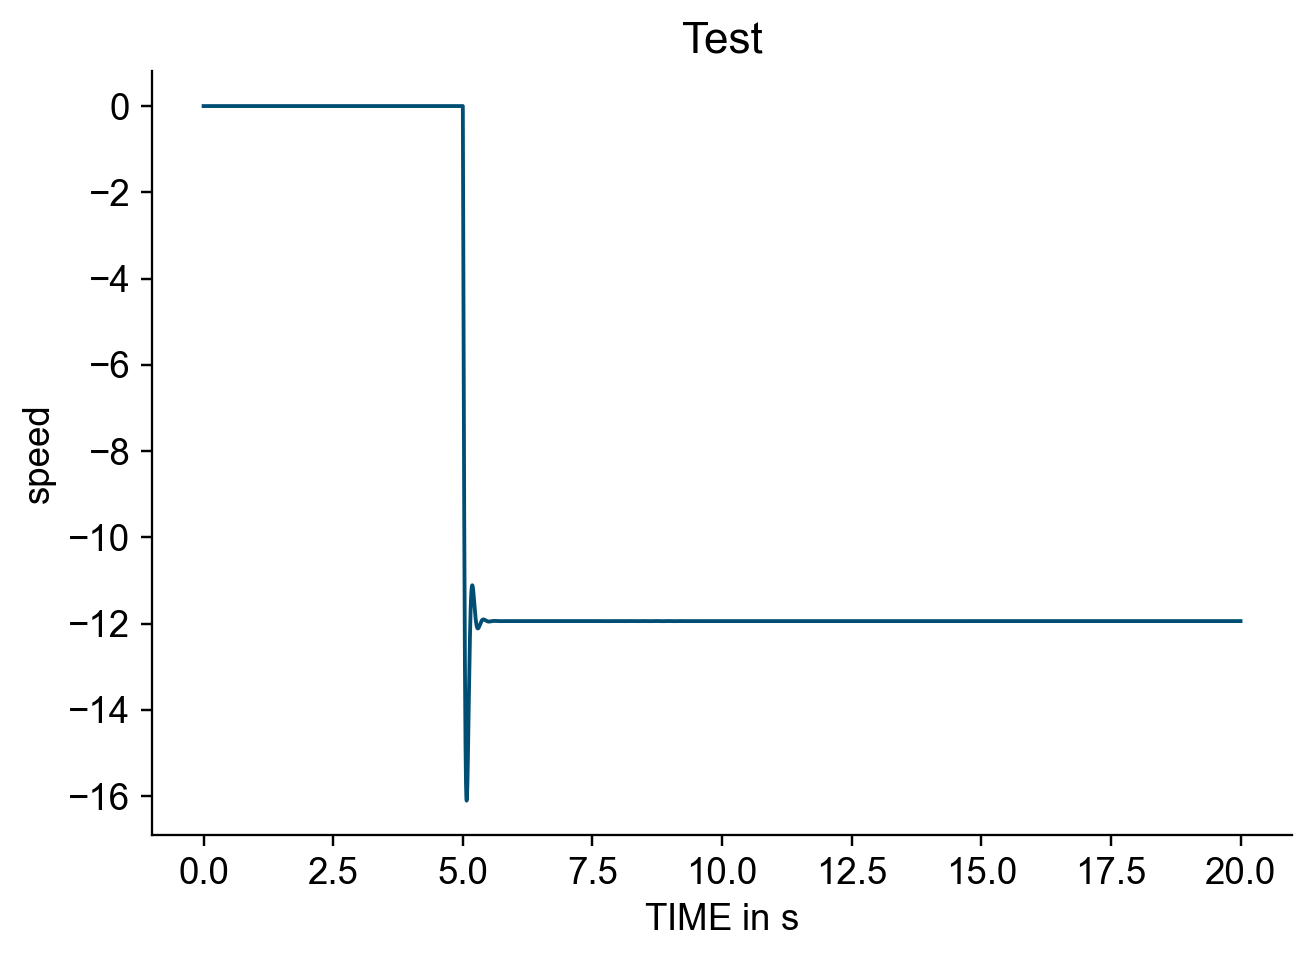

In [45]:
from src.analyze import plot_results
style_sheet_path = r"C:\Users\Daniele\Documents\GitLab\fair_sim_release\fair_sim_release\src\FST.mplstyle"
ax = plot_results(style_sheet_path,data ,["DCMotor.y"] ,y_label= "speed" ,x_label=r'TIME in $s$' , title = "Test")


In [46]:
data

,time,DCMotor.y,DCMotor.MotorTorque.tau,pid.u
0,0.00000,0.000000,0.000000,0.000000
1,0.00001,0.000000,0.000000,0.000000
2,0.00002,0.000000,0.000000,0.000000
3,0.00003,0.000000,0.000000,0.000000
4,0.00004,0.000000,0.000000,0.000000
...,...,...,...,...
1999996,19.99996,-11.939955,248.801714,11.939912
1999997,19.99997,-11.939955,248.801714,11.939912
1999998,19.99998,-11.939955,248.801714,11.939912
1999999,19.99999,-11.939955,248.801715,11.939912
